<a href="https://colab.research.google.com/github/pvnmahathi/FMML20210264-Labs/blob/main/Module2_Lab1_FMML20210264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 2: Appreciating, Interpreting and Visualizing Data
#### Coordinator: Kushagra Agarwal

---
# Lab 1

---



<!-- In this lab you will learn how to visualize a dataset and the various tools that can you help you do this. -->

It is often said **Data is only as good as it is presented**. Countless studies show how our brain is wired for the visual, and processes everything faster when it is through the eye. Therefore it becomes increasingly important to be able to APPRECIATE, INTERPRET and VISUALIZE data even before we start writing any form of code to process it.


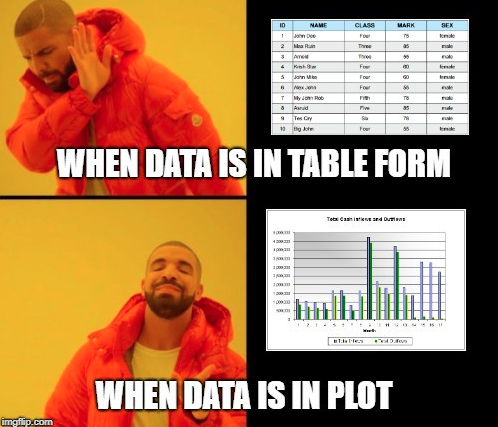

In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers. 

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

#### **Anatomy of a Matplotlib Figure**

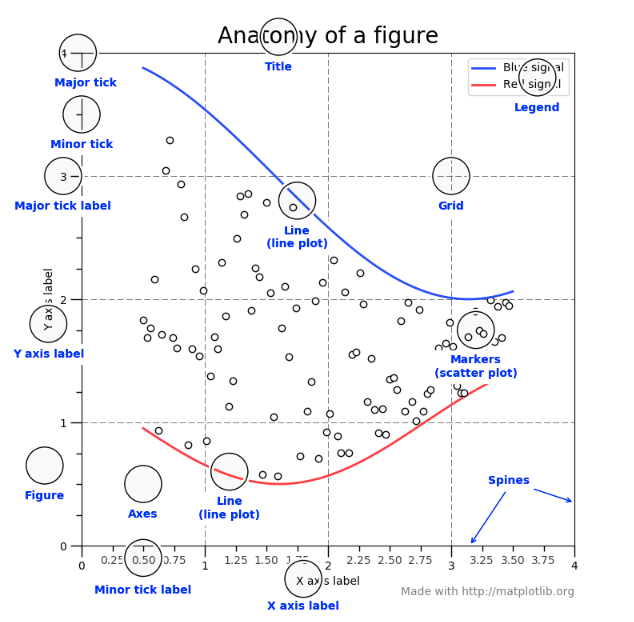

Let's start with a real dataset, the Automobile dataset from Kaggle (https://www.kaggle.com/toramky/automobile-dataset).

This dataset consists of data from 1985 Ward's Automotive Yearbook for some features relating to nearly 200 cars (e.g. the car maker, mileage, dimensions, etc.) and their prices.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Automobile_data.csv to Automobile_data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset

data = pd.read_csv("Automobile_data.csv")
print(len(data))
data.head()

205


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

193


In [ ]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.

As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

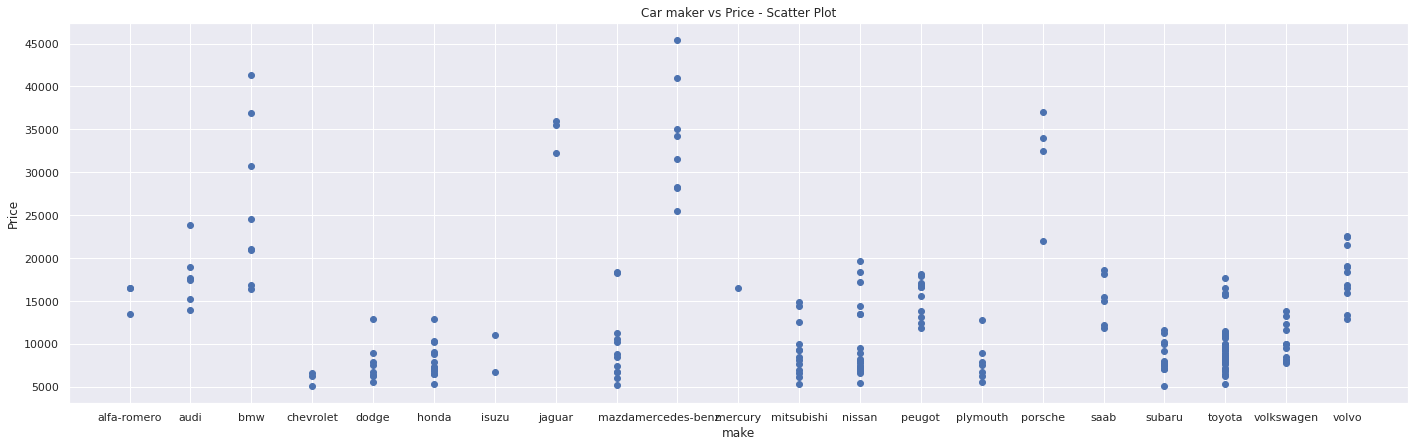

In [ ]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib. 

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

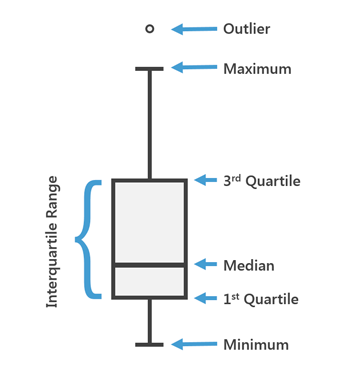

Text(0.5, 1.0, 'Car maker vs Price - Box Plot')

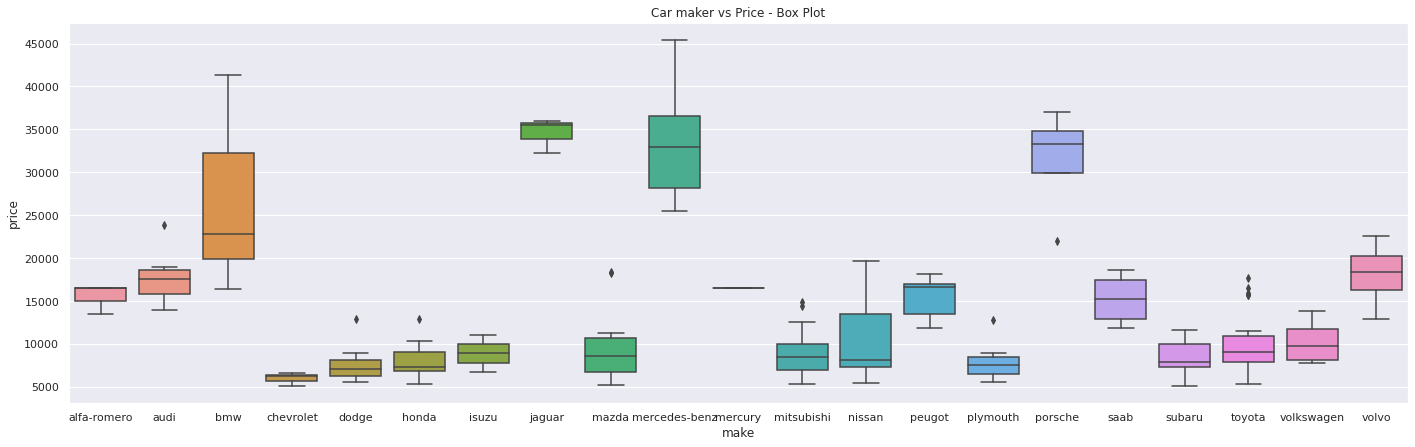

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y).set_title('Car maker vs Price - Box Plot')

It becomes evidently clear that Mercedes-Benz, Jaguar and Porsche have the costliest cars. BMW too has costly cars but the large interquartile range suggests that the company has a broader range of cars in the market. The outliers are also important as for example, Porsche has a car listed much lower than its normal price range as well.

All of these conclusions could be very hard to get to using the data in a tabular format, whereas it became evidently clear straight away once we used Visualization techniques to understand the dataset. 

You can also use a Violin Plot to understand the distribution within each car maker in a better way. These violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, its skewness etc. It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.


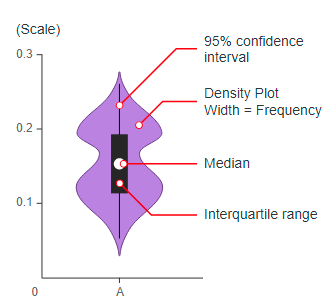

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

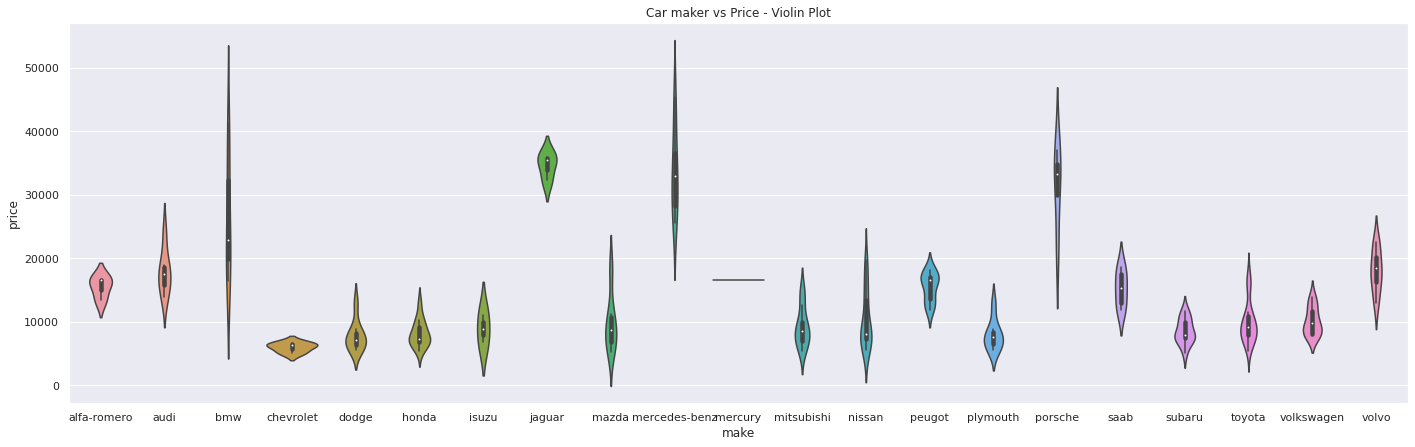

In [ ]:
sns.violinplot(x=X["make"],y=y).set_title('Car maker vs Price - Violin Plot')

Another plot type are the Swarm Plots. They offer an alternate way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

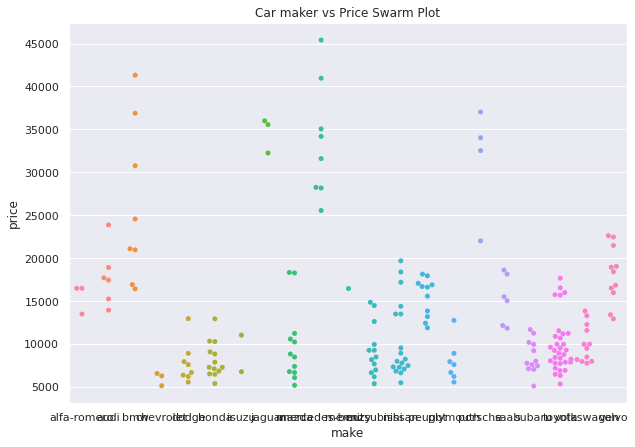

In [ ]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Now let us try to learn a bit more about the various features in our dataset. One of the features is Horsepower, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

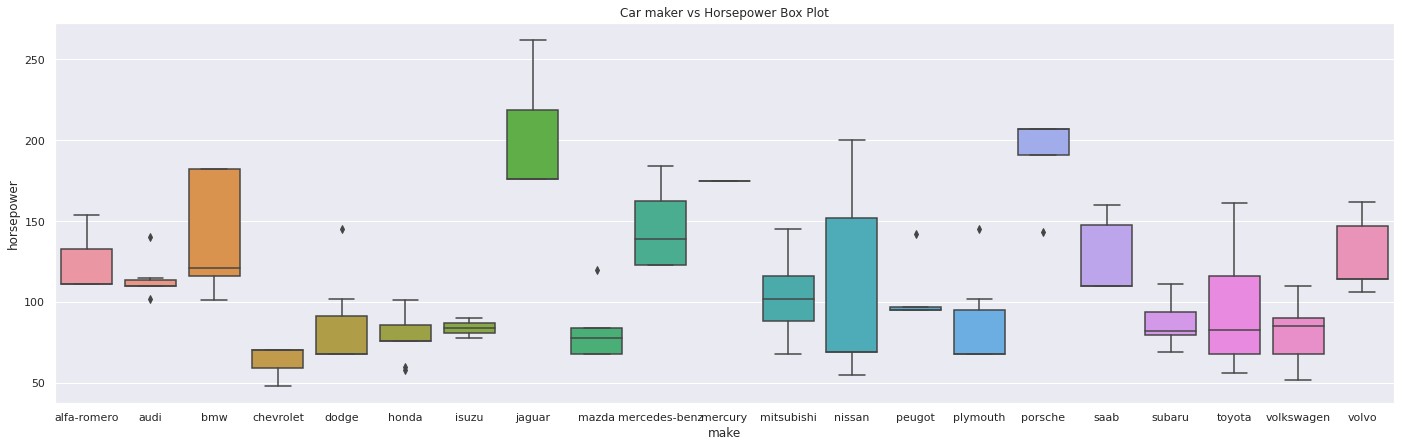

In [ ]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"])).set_title('Car maker vs Horsepower Box Plot')



As expected carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with our target variable "price". 

A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope.

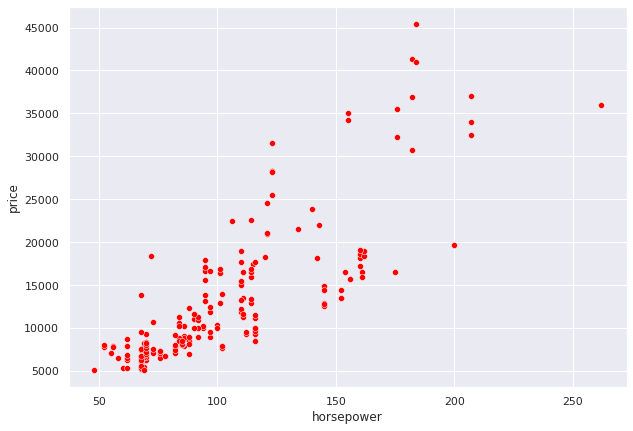

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

A better way of plotting these correlations is using a Jointplot instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence).

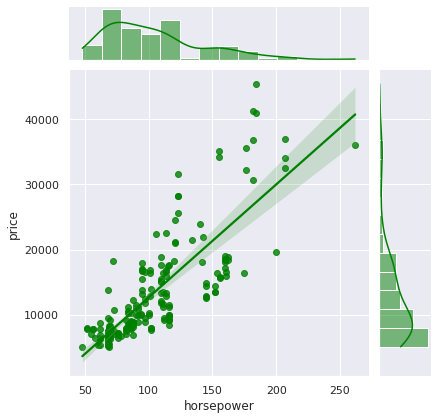

In [ ]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

## Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price". 

An example is shown below, with "highway-mpg" where MPG is miles per gallon.

### Hint: You should be using numeric features. The numeric features in the data are listed below: 

'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'

#### You are motivated to try all of these features to better understand the dataset

The below are the joint plots for each of the features and the target variable "price". Based on the plots we can identify the varaibles which are negatively correlated with the target variable "price" 

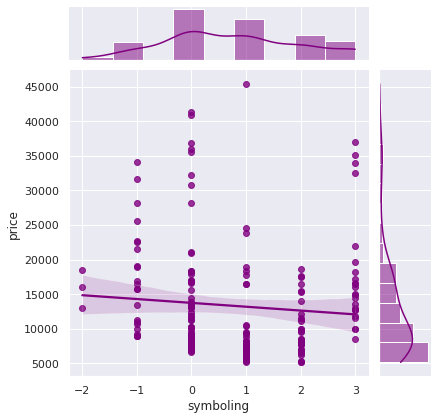

In [ ]:
feature = "symboling"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

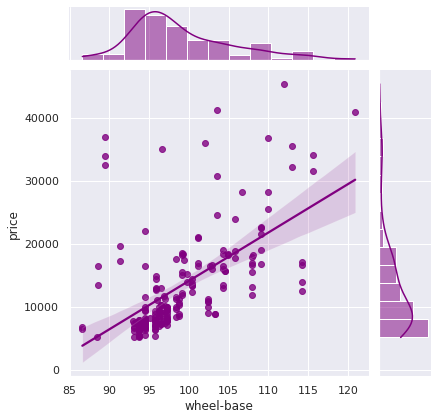

In [ ]:
feature = "wheel-base"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

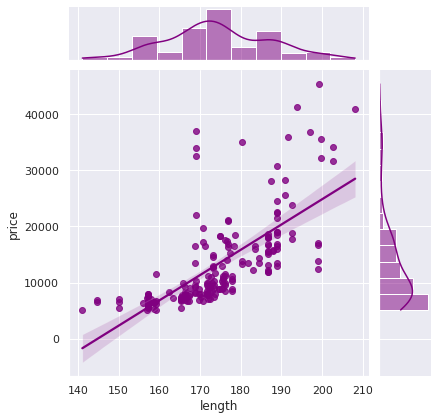

In [ ]:
feature = "length"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

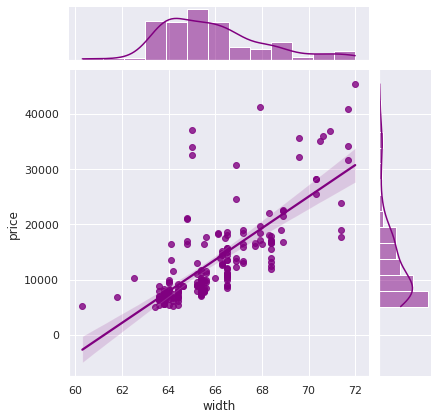

In [ ]:
feature = "width"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

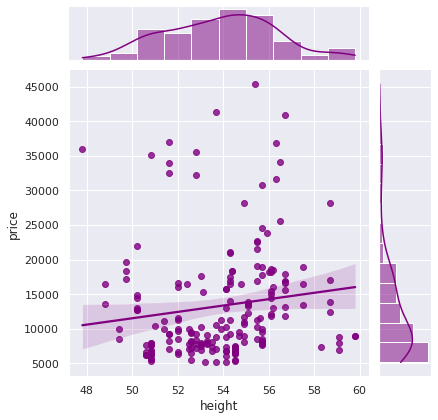

In [ ]:
feature ="height"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

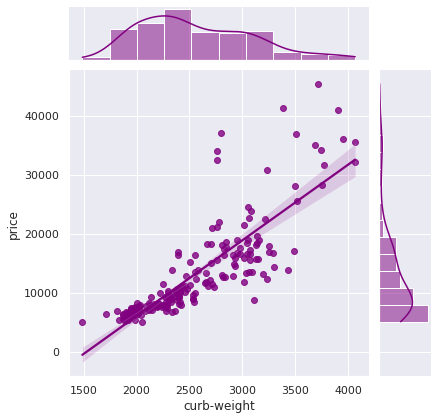

In [ ]:
feature = "curb-weight"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

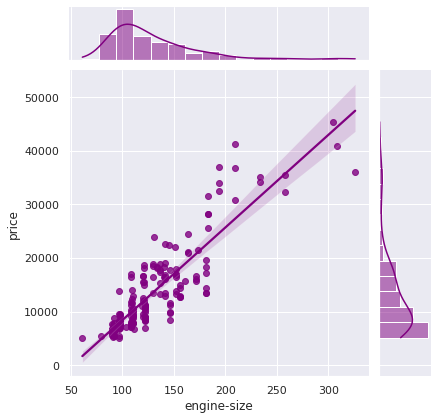

In [ ]:
feature = "engine-size"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

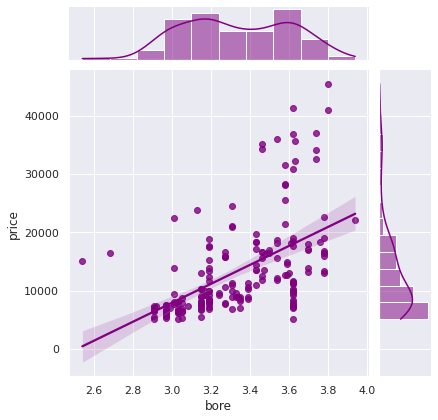

In [ ]:
feature = "bore"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

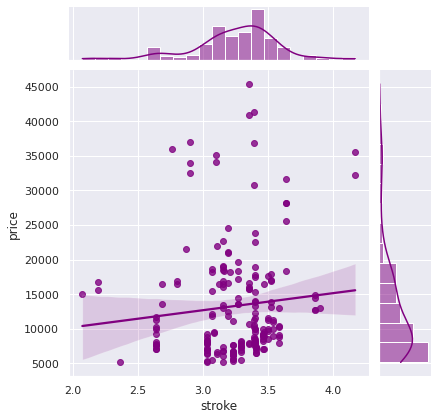

In [ ]:
feature = "stroke"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

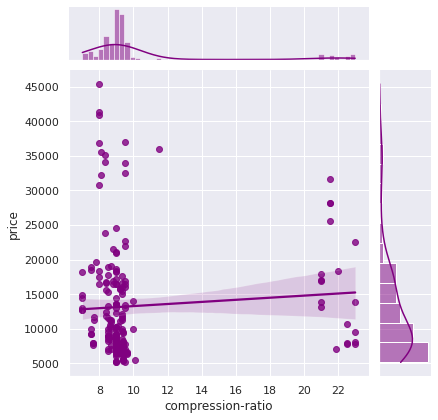

In [ ]:
feature = "compression-ratio"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

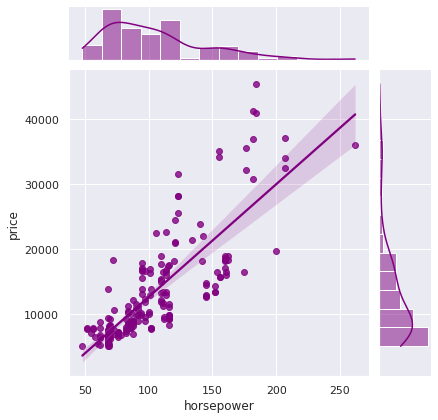

In [ ]:
feature = "horsepower"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

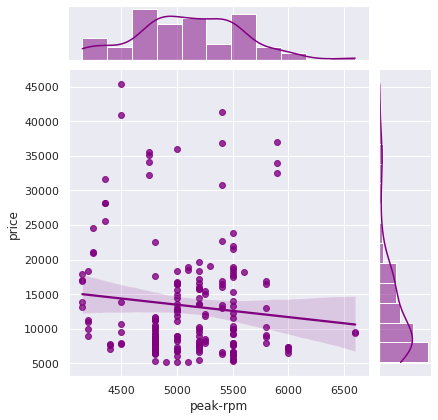

In [ ]:
feature = "peak-rpm"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

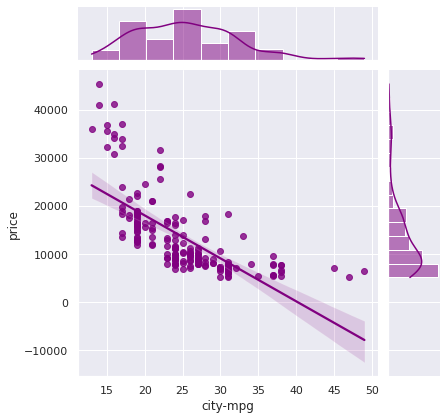

In [ ]:
feature = "city-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

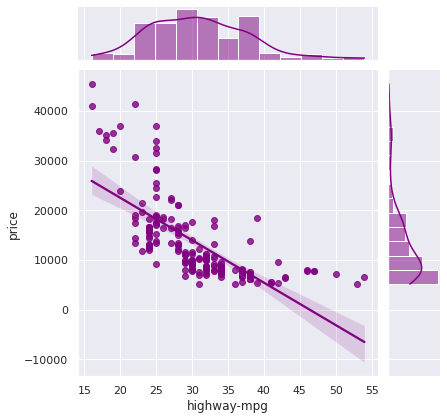

In [ ]:
feature = "highway-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

"symboling", "peak-rpm", "city-mpg", "highway-mpg" are the features which have negative correlation with the target variable "price" as interpreted from the joint plot

## Question: Interpret the plot below. List all the interpretations point by point using the plot below.

Some pointers: 

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

3) Do you think the body-style of a car can be a good predictor for its price? 


Text(0.5, 1.0, 'Body style vs Price Box Plot')

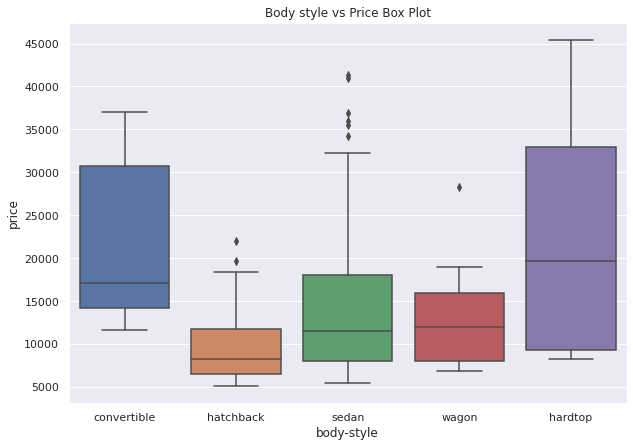

In [ ]:
sns.boxplot(x=X["body-style"],y=y).set_title('Body style vs Price Box Plot')

1. From the above boxplots, we can see that that "hardtop" is the costliest body-type.

2. Maximum and minimum values can be an indication of the the costliest body-type in this case. In certain cases, the interpretation may improve by taking the interquartile range into consideration. As, based on the interquartile range we can get information about the outliers present and this may indicate that outlier points may be the more than the maximum.

3. Body-style may not be a good predictor of price as we can see that the prices of "wagon", "hatchback" , "sedan" almost have the same range except a few outliers. This might affect the prediction and hence it would not be a good predictor.

## Some more interpretations from the box plot 

1. "Wagon" usually has its prices in the lower range. However there is a car of "Wagon" style which has a price greater than its normal range of prices. This can be seen from the outliers.

2. The model "hardtop" has cars of all ranges and it is the costliest one. It has larger interquartile range, so we can say that it has wide range of cars

3. The model "Hatchback" has a smaller interquartile range, indicating it has very small range of prices. 

4. Models like "Hatchback", "Sedan", "Wagon" usually have their prices in the lower ranges. However, there are some cars in these models which fall out of their normal price ranges(outliers)

Some interesting references:


1) https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2) https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7


3) https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2






